# Isolating a specific color in an image

Try in all three color spaces:
- RGB
- HSV
- Lab*

## Attempting to isolate `green color`.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

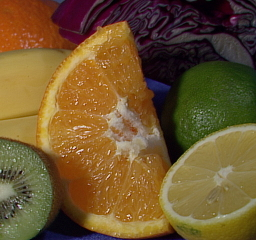

In [2]:
image = cv2.imread('fruit.jpg')

# Display the original image
cv2_imshow(image)


## Isolating Green in RGB

In [3]:
print("Attempting to isolate green using the RGB color space...")

# Convert from OpenCV's default BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the lower and upper bounds for green
# This is hard because a light green and a dark green will have very different R,G,B values.
# The values below are a general guess for a specific shade of green.
lower_bound_rgb = np.array([0, 100, 0])
upper_bound_rgb = np.array([100, 255, 100])

# Create a mask using the `inRange` function
mask_rgb = cv2.inRange(image_rgb, lower_bound_rgb, upper_bound_rgb)

# Apply the mask to the original image
result_rgb = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_rgb)

Attempting to isolate green using the RGB color space...


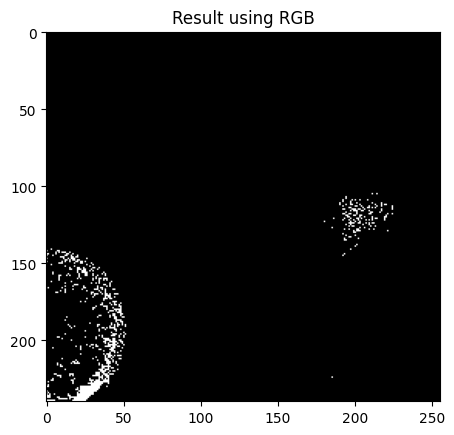

In [5]:
# Display the mask
plt.title('Result using RGB')
plt.imshow(mask_rgb, cmap='gray')
plt.show()

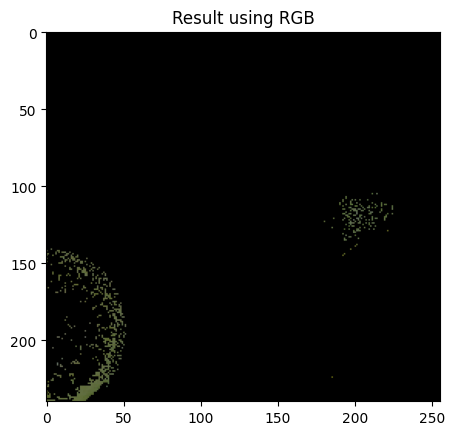

In [ ]:
# Display the results
plt.title('Result using RGB')
plt.imshow(result_rgb)
plt.show()

## Isolating Green in HSV

In [6]:
print("Attempting to isolate green using the HSV color space...")

# Convert from BGR to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for green
# This is much easier as Hue (H) separates color from brightness and saturation.
# The Hue value for green is around 60 (out of 179).
# Saturation (S) and Value (V) are kept wide to capture all shades.
lower_bound_hsv = np.array([40, 50, 50])
upper_bound_hsv = np.array([80, 255, 255])

# Create a mask
mask_hsv = cv2.inRange(image_hsv, lower_bound_hsv, upper_bound_hsv)

# Apply the mask to the original image
result_hsv = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_hsv)

Attempting to isolate green using the HSV color space...


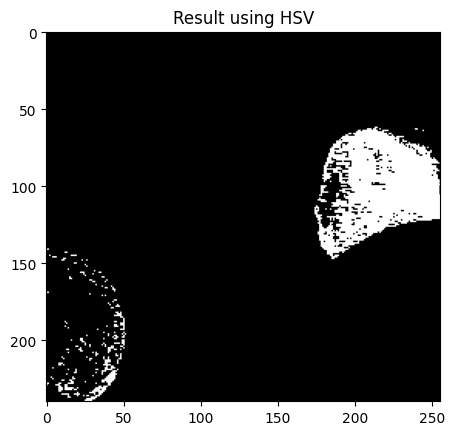

In [7]:
# Display the mask
plt.title('Result using HSV')
plt.imshow(mask_hsv, cmap='gray')
plt.show()

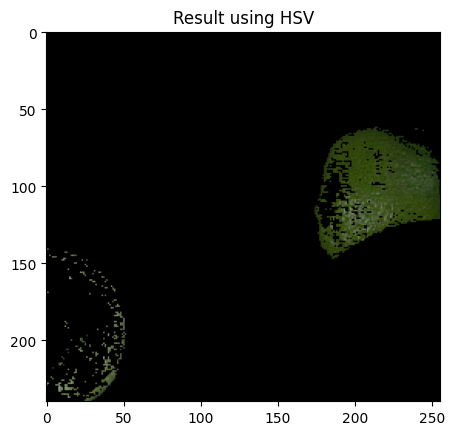

In [8]:

# Display the results
plt.imshow(result_hsv)
plt.title('Result using HSV')
plt.show()

## Isolating Green in Lab*

In [9]:
print("Attempting to isolate green using the Lab* color space...")

# Convert from BGR to L*a*b*
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Define the lower and upper bounds for green
# In L*a*b*, green corresponds to negative 'a*' values.
# The `a*` channel's range is 0-255 in OpenCV, with 128 as the neutral point.
# So, values less than 128 are green.
lower_bound_lab = np.array([0, 0, 0])
upper_bound_lab = np.array([255, 120, 255])

# Create a mask
mask_lab = cv2.inRange(image_lab, lower_bound_lab, upper_bound_lab)

# Apply the mask
result_lab = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_lab)

Attempting to isolate green using the Lab* color space...


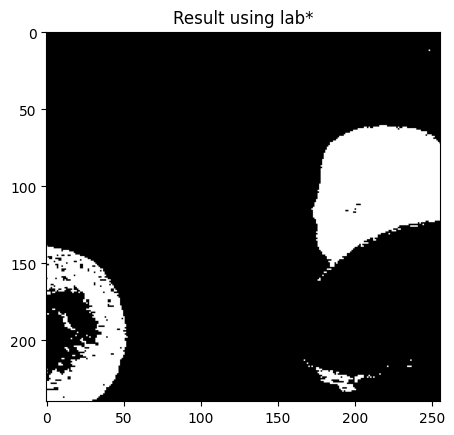

In [11]:
# Display the mask
plt.title('Result using lab*')
plt.imshow(mask_lab, cmap='gray')
plt.show()

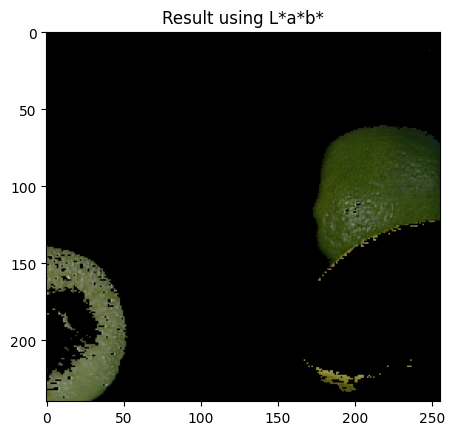

In [10]:
# Display the results
plt.imshow(result_lab)
plt.title('Result using L*a*b*')
plt.show()


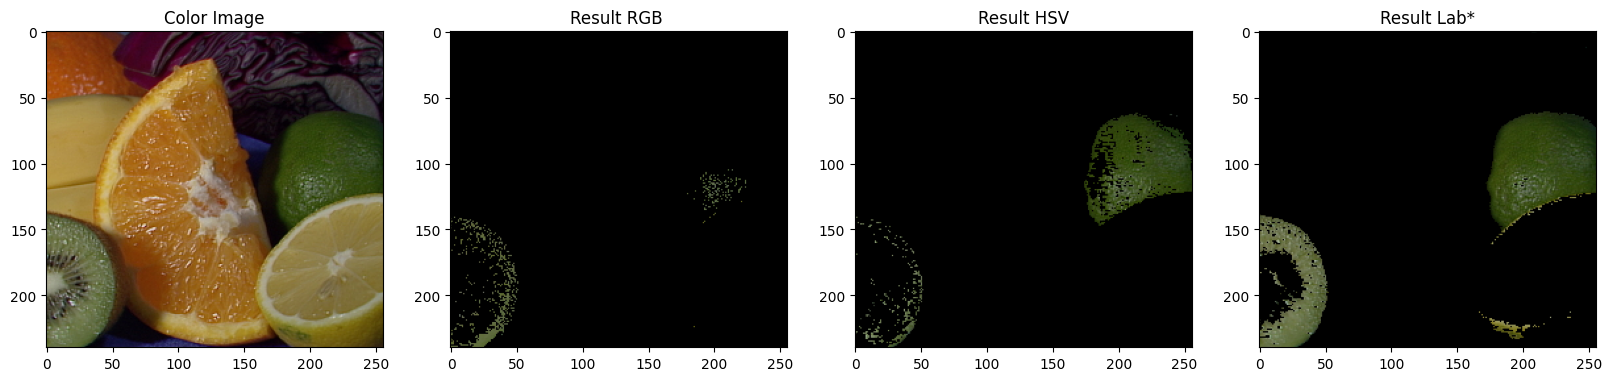

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('Color Image')
ax1.imshow(image_rgb)

ax2.set_title('Result RGB ')
ax2.imshow(result_rgb)

ax3.set_title('Result HSV')
ax3.imshow(result_hsv)

ax4.set_title('Result Lab*')
ax4.imshow(result_lab)

plt.show()